<a href="https://colab.research.google.com/github/PrajwalRedee/Netflix-Data-Analysis/blob/main/EDA_NETFLIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Netflix shows and movies EDA

In [1]:
pip install opendatasets --upgrade --quiet


Downloading the dataset from kaggle

In [3]:

import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/shivamb/netflix-shows'

od.download(download_url)

Skipping, found downloaded files in "./netflix-shows" (use force=True to force download)


In [4]:
filename = '/content/netflix-shows/netflix_titles.csv'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [6]:
df = pd.read_csv(filename)

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.shape

(8807, 12)

In [9]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Convert the date_added column to datetime

In [10]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format="%B %d, %Y")

In [11]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [12]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


We can see that the oldest movies that is there in the dataset was released in 2019 and the newest movies was released in 2021


In [13]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Lets fill the data which has NaN values

In [14]:
df['director'].fillna('No Director', inplace=True)
df['cast'].fillna('No Cast', inplace=True)
df['duration'].fillna(0,inplace=True)
df['country'].fillna('Country Unavailable', inplace=True)
df.dropna(subset=['date_added','rating'],inplace=True)

In [15]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
df.duration = df.duration.str.replace(' min','')


In [17]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,No Director,No Cast,Country Unavailable,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Lets check the histogram of the release_year column

In [18]:
fig = px.histogram(df, x='release_year')
fig.update_layout(bargap=0.1)
fig.show()

We can see that the plot is left skewed. And the data has more movies that released in the year 2018 

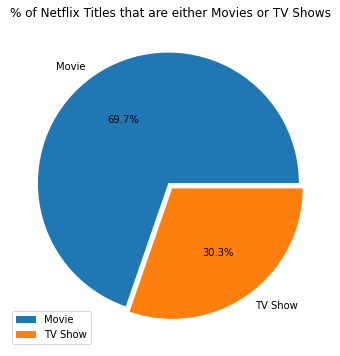

In [19]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
plt.pie(df.type.value_counts(), explode=(0.025,0.025), labels=df.type.value_counts().index,autopct='%1.1f%%');
plt.legend()
plt.show()

In [20]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [21]:
fig = px.histogram(df, x='date_added', color='type')
fig.update_layout(bargap=0.1)
fig.show()

We can see that there more movies added than tv shows

Lets create a lineplot to show the counts of TV shows and movies in each year

In [22]:
netflix_movie = df[df['type'] == 'Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_show = df[df['type'] == 'TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})


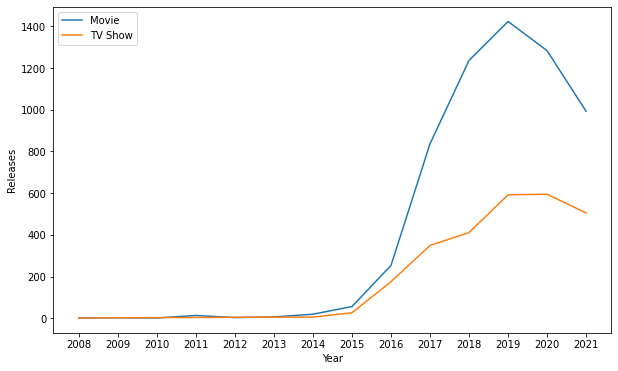

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=netflix_movie, x='year', y='count')
sns.lineplot(data=netflix_show, x='year', y='count')
ax.set_xticks(np.arange(2008, 2022, 1))
plt.legend(['Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

We can see that Netflix began to grow from 2015. We can see a lot of movies and shows were added from 2015

In [24]:
netflix_shows = df[df['type']=='TV Show'].copy()
netflix_shows.rename(columns={'duration':'seasons'}, inplace=True)
netflix_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
netflix_shows.seasons = netflix_shows.seasons.str.replace(' Seasons','').astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



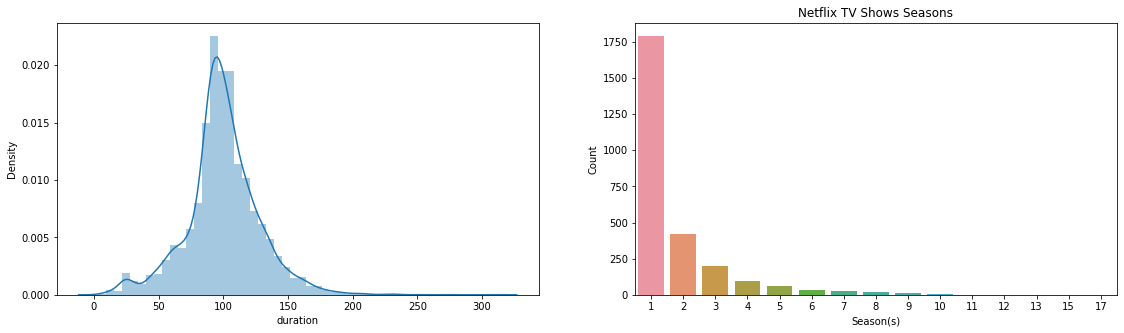

In [25]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
sns.distplot(df[df['type']=='Movie'].duration,ax=ax[0])
plt.title("Duration Distribution for Netflix Movies")
plt.xlabel("Duration (minutes)")
sns.countplot(netflix_shows.seasons,ax=ax[1]);
plt.title("Netflix TV Shows Seasons")
plt.ylabel("Count")
plt.xlabel("Season(s)")
plt.show()

Countries with the most content available


In [26]:
countries = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
countries = countries[countries != 'Country Unavailable']

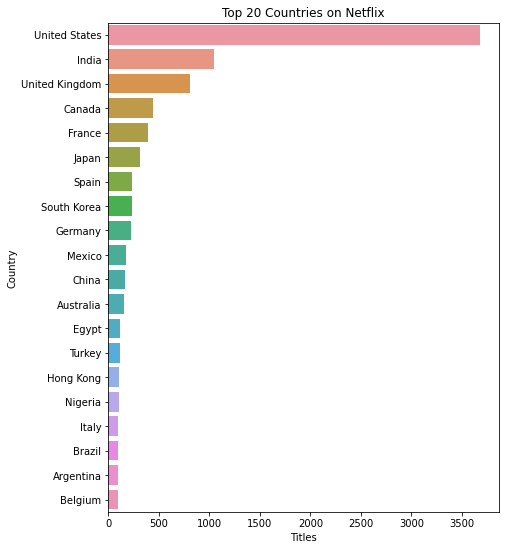

In [27]:
plt.figure(figsize=(7,9))
sns.countplot(y = countries, order= countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

We can see that United States stands on top

In [28]:
genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);


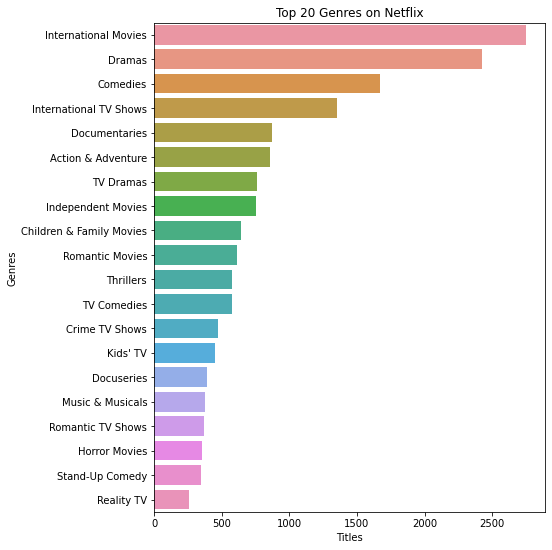

In [29]:
plt.figure(figsize=(7,9))
sns.countplot(y = genres, order=genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()


## Conclusion

* Analyzed top 20 geners on Netflix
* Countries with most content on Netlix
* Graph between Tv Show and Movie for each year
* Number of Tv Show and Movies added in each year
* Pie chart to show the most number of counts between Tv Shows and Movies